In [1]:
import os
# os.chdir('Completar con ruta absoluta del proyecto')
os.chdir("C:/Users/julip/Coding/Python Projects/neural-networks")
import models.layers as layers
import numpy as np
import matplotlib.pyplot as plt
from models.models import NeuralNetwork
import models.activations as activations
import training.optimizers as optimizers
import training.losses as losses
import utils.metrics as metrics

### CNN

In [2]:
import utils.dataset as dt

# Cargar dataset
x_train, y_train, x_test, y_test, x_val, y_val = dt.load_mnist(validation_size=0.2)

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_val.shape, y_val.shape)

(44800, 1, 28, 28) (44800, 10)
(14000, 1, 28, 28) (14000, 10)
(11200, 1, 28, 28) (11200, 10)


: 

In [4]:
batch = x_train.shape[0]
x = x_train[:batch, :, :, :]
y = y_train[:batch]
c, h, w = x.shape[1:]
classes = y.shape[1]
epochs = 5
batch_size = 32

model = NeuralNetwork(
    input_shape=(c, h, w),
    layers=[    
        layers.Conv2D(filters=8, filter_size=3, activation='relu'),
        layers.MaxPool2D(pool_size=2),
        layers.Flatten(),
        layers.Dense(neurons=16, activation=activations.ReLU()),
        layers.Dense(neurons=classes, activation=activations.Softmax())
    ], 
    optimizer=optimizers.Adam(), 
    loss=losses.CategoricalCrossEntropy(reduction='mean'), 
    metrics=metrics.categorical_accuracy,
    verbose=True
)
model.summary()


NeuralNetwork con 6 capas:
- input: Entrada - (None, 1, 28, 28)
- conv: Conv2D - (None, 8, 26, 26) - 80 params
    Pesos:  (3, 3, 1, 8)
    Bias:  (8,)
- max_pooling: MaxPool2D - (None, 8, 13, 13)
- flatten: Flatten - (None, 1352)
- dense: Dense - (None, 16) - 21648 params
    Pesos:  (1352, 16)
    Bias:  (16,)
- dense: Dense - (None, 10) - 170 params
    Pesos:  (16, 10)
    Bias:  (10,)
Optimizador: Adam - Learning rate: 0.001
Función de pérdida: CategoricalCrossEntropy
Función de cálculo de métricas: Categorical_accuracy
Cantidad de parámetros: 21898


In [5]:
history = model.train(x, y, epochs=1, batch_size=batch_size)
train_loss = history['train']['loss']
train_acc = history['train']['categorical_accuracy']

Entrenando el modelo...
Epoch 1/1 - Loss: 0.2285 - categorical_accuracy: 0.90625


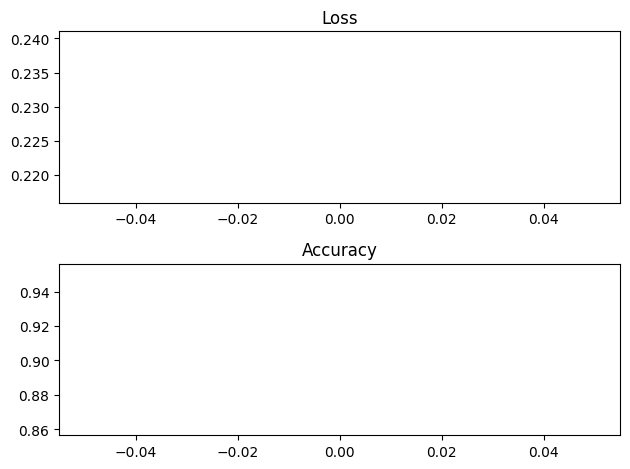

In [6]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(train_loss)
ax[0].set_title('Loss')
ax[1].plot(train_acc)
ax[1].set_title('Accuracy')
plt.tight_layout()
plt.show()

In [7]:
loss, acc = model.evaluate(x_test, y_test)
print('Pérdida: ', loss)
print('Accuracy: ', acc)

Pérdida:  0.22856111097808016
Accuracy:  0.9331428571428572


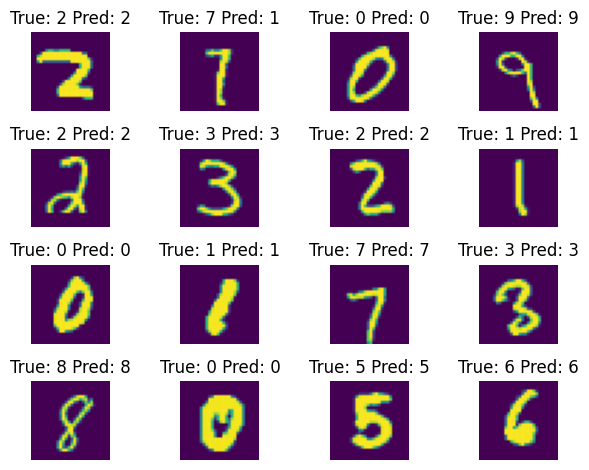

In [11]:
indices = np.random.permutation(len(x_test))

x_test = x_test[indices]
y_test = y_test[indices]
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.axis('off')
    plt.imshow(x_test[i:i+1][0][0])
    true = np.argmax(y_test[i:i+1])
    pred = np.argmax(model(x_test[i:i+1]))
    plt.title(f"True: {str(true)} Pred: {str(pred)}")
plt.tight_layout()

In [12]:
model.save_parameters("conv_model_params")

###  RNN

In [ ]:
import utils.dataset as dt

# Cargar dataset
# x_train, y_train, x_test, y_test, x_val, y_val = dt.load_mnist(validation_size=0.2)